<h1>A Damped Random Walk Process Based on a Mixture of Gaussian and Student's t Measurement Errors</h1>
<h2>Data</h2>
<p>
    The damped random walk model (Kelly et al., 2009) is well known for its ability to fit an AGN light curve with interpretable model parameters. A data set for a typical light curve is composed of three columns. The first column contains the observation time of each measurement in ascending order (typically in days). The second column is for the magnitudes. Finally the third column is about one-sigma measurement error  uncertainty. If a data file contains additional columns, be sure to filter out these three columns before bringing them into the program. In most cases, each column of data will have a header, so skip those header rows to avoid errors when loading your data. Detailed instructions for loading text files can be found <a href="https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html">here</a>. For example a few lines of the data may look like the following.

</p>
<table>
  <tr>
    <td>383.59</td>
    <td>17.993</td>
    <td>0.063</td>
  </tr>
  <tr>
    <td>398.76</td>
    <td>18.010</td>
    <td>0.083</td>
  </tr>
  <tr>
    <td>419.70</td>
    <td>18.066</td>
    <td>0.069</td>
  <tr>
    <td>436.62</td>
    <td>18.049</td>
    <td>0.074</td>
  <tr>
    <td>471.60</td>
    <td>18.098</td>
    <td>0.064</td>
  <tr>
    <td>494.53</td>
    <td>18.029</td>
    <td>0.101</td>
  <tr>
    <td>501.49</td>
    <td>18.047</td>
    <td>0.078</td>
  <tr>
    <td>563.83</td>
    <td>18.090</td>
    <td>0.081</td>
  </tr>
  <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
</table>
<p>
  These three columns are from 'macho.dat'. This data file contains the brightness time series data of MACHO source 70.11469.82 that are irregularly observed via an R-band optical filter on 242 nights for 7.5 years since 1992 (Geha et al. 2003). The data can be downloaded <a href="http://www.astro.yale.edu/mgeha/MACHO/70.11469.82.html">here</a>. The figure below shows all 242 observations in macho.dat. The x-axis is the observation time, and the y-axis represents the magnitude, and the half lengths of vertical lines around the symbols indicate the uncertainties (standard deviations) of the observed magnitudes.
</p>

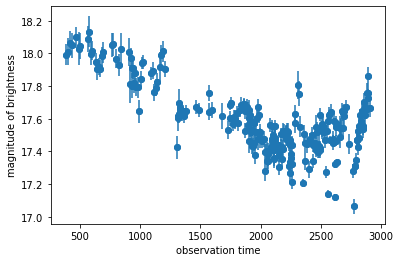

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("D:/project/datafile.txt")
x, y = data[:,0], data[:,1]
plt.scatter(x,y)

error = data[:,2]
plt.errorbar(x, y, yerr=error, fmt="o")
plt.xlabel("observation time")
plt.ylabel("magnitude of brightness")
plt.show()

<h2>Model</h2>
<p>
    A damped random walk process model (Kelly et al., 2019) assumes that there exists an underlying latent light curve $X(t)$ that represents the unknown true magnitudes at time $t~ (\in R)$. The observed light curve is assumed to be measured around this latent light curve at discretized and irregularly-spaced observation times up to measurement error. A state-space diagram of this model can be described as follows.
</p>

\begin{eqnarray*}
    &State:& &X(t_1)& \rightarrow &X(t_2)& \rightarrow ...\rightarrow &X(t_n)&        \\
    &&       &\big\downarrow&     &\big\downarrow&                    &\big\downarrow&\\
    &Space:& &x_1&                &x_2&                               &x_n&           \\
\end{eqnarray*}

<p>
The underlying latent light curve is assumed to be a realization of a damped random walk process. This process is based on the following stochastic differential equation（Kelly et al. 2009).
</p>
<p>
$$
dX(t)=-\frac{1}{\tau}(X(t)-\mu)dt+\sigma dB(t),
$$
</p>
<p>
where $B(t)$ is the standard Brownian motion. This damped random walk model contains three parameters; overall mean $\mu$, short-term variability $\sigma$, and timescale $\tau$. In an astronomical setting, $\mu$ is the long-term average magnitude, $\sigma$ is the average one-sigma uncertainty in a short timescale, and $\tau$ is a mean-reversion time (average time for a process to come back to the overall mean when the process deviates from the overall mean). The figure below illustrates these three model parameters in light of a synthetic light curve.
</p>

<img src="illu_drw2.png" width=500 height=500 />
<p>
The solution of this stochastic differential equation results in Gaussian conditional distributions of the latent magnitudes given those in the previous observation times. That is,
</p>
<p>
$$
X(t_1)\mid\theta \sim N \left(\mu,~ \frac{\tau \sigma^2}{2}\right), \text{  and for } i=2,3,...,n,
$$
$$
X(t_i)\mid X(t_{i-1}), \theta \sim N \left( \mu + a_i(X(t_{i-1})-\mu),~ \frac{\tau \sigma^2}{2}(1-a_i^2)\right),
$$
</p>
<p>
where $a_i = \exp(-(t_i - t_{i-1}) / \tau)$. We note that the damped random walk process is the only process whose solution features Markovian, Gaussian, and stationary properties. Since these parameters of the damped random walk, i.e., $\mu$, $\sigma$, and $\tau$, are unknown, we adopt (almost) non-informative prior distributions, following Tak et al.$~$(2017).

$$
\mu\sim \textrm{Unif}(-30,~ 30),~~\sigma^2\sim \textrm{inverse-Gamma}(1,~ 10^{-7}), ~~\textrm{and}~ \tau\sim \textrm{inverse-Gamma}(1, 1).
$$

As we mention before, the observed data are assumed to be measured around the latent magnitudes up to measurement error, that is, for the $i$-th observation.

$$
x_i = X(t_i) + \epsilon_i
$$
    
The measurement error distribution is typically Gaussian (Kelly et al., 2009), that is, $\epsilon_i \sim N(0, \sigma_i^2)$ where $\sigma_i$ is a completely known one-sigma measurement error uncertainty given in the third column of the data set. This Gaussian measurement error  is the most efficient choice if the data do not have outlying observations. If not, the Gaussian measurement error is known to be sensitive to these outliers, producing biased parameter estimates. Thus, Tak et al. (2019) adopt the following mixture of Gaussian and Student's t distributions as a measurement error distribution. This mixture error is known to take advantage of the efficient Gaussian error assumption for non-outlying observations and the robust Student t error assumption for outliers. 


</p>
\begin{eqnarray*}
\epsilon_i|z_i, \nu &\sim& N(0, V_i)        &\text{if}& z_i=0,\\
                    &\sim& V_i^{0.5}t_{\nu} &\text{if}& z_i=1,\\
         z_i|\theta &\sim& \text{Bernoulli}(\theta),\\
             \theta &\sim& \text{Beta}(\alpha, \beta),\\
\end{eqnarray*}
<p>
where $t_{\nu}$ denotes the $t$ distribution with $\nu$ degrees of freedom, $z_i$ is an outlier indicator that is one if the $i$-th observation is considered an outlying observation and zero otherwise, $\theta$ is the probability of each object being an outlier. The degrees of freedom $\nu$ can be considered as a fixed constant instead of an unknown model parameter. In this tutorial, we assume that $\nu$ is an unknown parameter to be estimated. We assume that each outlier indicator is an i.i.d. Bernoulli($\theta$) random variable. Since the probability of being an outlier is an unknown parameter, we assume that this probability is a realization of Beta($\alpha$, $\beta$) distribution. A non-informative choice is to set $\alpha=\beta=1$, i.e., uniform between 0 and 1. If a vague idea about the expected proportion of outlying observations were available a priori, say $\theta_0$, an informative choice would be to set $\alpha = n \theta_0$ and $\beta = n (1 - \theta_0)$, where $n$ is the number of observations. In the same situation, a weakly informative choice would be to set $\alpha = n \theta_0 / 10$ and $\beta = n (1 - \theta_0) / 10$ so that the prior information affects the resulting posterior distribution less than the informative prior.
</p>
<p>
For computational simplicity we introduce an auxiliary variable $\alpha_i\sim \textrm{inverse-Gamma}(\nu/2, \nu/2)$ for all $i$ to represent a t-distribution as a mixture of Gaussian and inverse-Gamma distributions. As a result, we can express the measurement error distribution as follows.
</p>
<p>
$$
\epsilon_i \mid z_i, \alpha_i \sim N(0, \alpha_i^{z_i}V_i),
$$
$$
z_i \mid \theta \sim \text{Bernoulli}(\theta), \theta \sim \text{Beta}(km, k(1-m)),
$$
$$
\alpha_i \mid \nu \sim \text{inverse-Gamma}(\nu/2, \nu/2), \nu \sim \text{Uniform}(1,40).
$$
</p>
<p>
    Note that marginally this measurement error distribution is the same as the one that we specified above, but is computationally more convenient to deal with than the one above. The degrees of the freedom of a t-distribution, $\nu$, can be a fixed constant or an unknown model parameter to be estimated. In the latter case, we put a Uniform(1, 40) prior distribution.

As a result, the distribution of each observation becomes

$x_i\mid X(t_i) \sim N(X(t_i),~ \alpha_i^{z_i}V_i).$
    
Consequently, the full posterior distribution of the unknown states and model parameters is defined as 
</p>

\begin{eqnarray*}
     \pi(X(t_1), X(t_2), \ldots, X(t_{242}), \mu, \sigma^{2}, \tau, z, \theta, \alpha, \nu,\mid x) \\
         \propto q(z, \theta, \alpha, \nu)h(\mu, \sigma^{2}, \tau)\prod_{i=1}^{242} f(x_i \mid X(t_i), z_i, \alpha_i) \\
         \times g(X(t_1)\mid \mu, \sigma^{2}, \tau)\prod_{i=2}^{242} g(X(t_i)\mid X(t_{i-1}), \mu, \sigma^{2}, \tau), \\
\end{eqnarray*}

<p>
where $z=\{z_1, \ldots, z_{242}\}$ and $\alpha=\{\alpha_1, \ldots, \alpha_{242}\}$. The joint densify function $q(z, \theta, \alpha, \nu)$ is defined as a product of probability density functions whose distributions are specified in the previous measurement error distributions. The joint density $h(\mu, \sigma^2, \tau)$ is also defined before when we discussed the prior distributions of these model parameters. The density function $f(x_i\mid X(t_i), z_i, \alpha_i)$ is based on the distribution of each observation, specified above. Finally the density functions,  $g(X(t_1)\mid \mu, \sigma^2, \tau)$ and $g(X(t_i)\mid X(t_{i-1}), \mu, \sigma^2, \tau)$ are based on the Gaussian distributions defined before as the solution of the stochastic differential equation. This package drw4e provides a function to samples the full posterior distribution using a Gibbs sampler proposed by Tak et al. (2019), where each unknown model parameter is sampled given the others at every iteration.
</p>

<h2>Gt function in drw4e</h2>
<p>
    The function needs 3 mandatory arguments (data, sample_size, and warmingup_size) and 17 optional arguments to adopt the proposed mixture error in fitting the damped random walk model on the data. The following table explains these 20 arguments, including default values for the optional arguments. The bold-faced numbers or characters are the default values.
</p>
<table>
  <tr>
    <td>data:</td>
    <td style='text-align: left'><strong>data</strong>. The n by 3 matrix described in the data above; the first column contains the observation times, the second column has magnitudes, and the last column lists measurement error one-sigma uncertainties. </td>
  </tr>
  <tr>
    <td>z_ini:</td>
    <td style='text-align: left'><strong>np.repeat(0, len(time))</strong>. A vector containing initial values of outlier indicators, $z_i$'s. Each $z_i$ is 1 if datum $i$ is an outlying observation and 0 otherwise. The default is to set the values of these indicators to a vector of zeros. 
</td>
  </tr>
  <tr>
    <td>theta_ini:</td>
    <td style='text-align: left'><strong>0.01</strong>. An initial value of the probability of each object being an outlier, $\theta$. The default value is 0.01.</td>
  </tr>
  <tr>
    <td>alpha_ini:</td>
    <td style='text-align: left'><strong>np.repeat(1, len(time))</strong>. A vector containing the initial values of auxiliary variables, $\alpha_i$'s. These values are augmented to convert a Gaussian measurement error to a t measurement error. The default is to set these values to a vector of ones.
</td>
  </tr>
  <tr>
    <td>OU_ini:</td>
    <td style='text-align: left'><strong>list((18, 0.01, 200))</strong>. A vector containing initial values of the main model parameters, i.e., overall mean $\mu$, short-term variability $\sigma$ and timescale $\tau$ of the damped random walk model. The default is to set 18 magnitude, 0.01 measurement error standard deviation, and 200 days as a timescale.
</td>
  </tr>
  <tr>
    <td>tau_prior_shape:</td>
    <td style='text-align: left'><strong>1</strong>. The shape parameter of the inverse-Gamma prior distribution for $\tau$. Its default value is one.
</td>
  </tr>
  <tr>
    <td>tau_prior_scale:</td>
    <td style='text-align: left'><strong>1</strong>. The scale parameter of the inverse-Gamma prior distribution for $\tau$. Its default value is one. These unit shape and scale parameters imply a priori that 0.5 day is a soft-lower bound of the timescale.</td>
  </tr>
  <tr>
    <td>sigma_prior_shape:</td>
    <td style='text-align: left'><strong>1</strong>. The shape parameter of the inverse-Gamma prior distribution for $\sigma^2$. Its default value is one.</td>
  </tr>
  <tr>
    <td>sigma_prior_scale:</td>
    <td style='text-align: left'><strong>10**(-7)</strong>. The scale parameter of the inverse-Gamma prior distribution for $\sigma^2$. The default value is $10^{-7}$. Combined with the unit shape parameter, this default scale parameter implies a priori that $10^{-7} / 2$ is a soft-lower bound of the short-term variability (in variance).</td>
  </tr>
  <tr>
    <td>tau_log_jump_scale:</td>
    <td style='text-align: left'><strong>1.5</strong>.The proposal scale of a Metropolis-Hasting step for updating the timescale on a logarithmic scale, i.e., $\log(\tau)$, in the Gibbs sampler. The default value is 1.5, but this value changes during the run because of an adaptive Markov chain Monte Carlo technique (adjusted to match the acceptance probability near 0.35). </td>
  </tr>
  <tr>
    <td>a_beta:</td>
    <td style='text-align: left'><strong>1</strong>.It is the value for the shape1 parameter of the beta distribution for the unknown probability of each object being an outlier. As mentioned above, the default value is for a non-informative choice, i.e., uniform between 0 and 1. Users may want to adopt weakly-informative or informative choices. Please read the description above about such choices to change this default value accordingly.</td>
  </tr>
  <tr>
    <td>b_beta:</td>
    <td style='text-align: left'><strong>1</strong>. It is the value for the shape2 parameter of the beta distribution for the unknown probability of each object being an outlier. As mentioned above, the default value is for a non-informative choice, i.e., uniform between 0 and 1. Users may want to adopt weakly-informative or informative choices. Please read the description above about such choices to change this default value accordingly.</td>
  </tr>
  <tr>
    <td>df_scale:</td>
    <td style='text-align: left'><strong>0.2</strong>. The proposal scale of a Metropolis-Hasting step for updating the degrees of freedom on a logarithmic scale, i.e., $\log(\nu)$, in the Gibbs sampler. The default value is 0.2, but this value changes during the run because of an adaptive Markov chain Monte Carlo technique (adjusted to match the acceptance probability near 0.35). This argument is necessary if an argument "df_random" is set to "True" below. This argument is not used at all if "df_random" is set to "False".</td>
  </tr>
  <tr>
    <td>t_df:</td>
    <td style='text-align: left'><strong>4</strong>. The initial value of degrees of freedom. Its default value is 4. This argument is necessary if an argument "df_random" is set to "True" below. The default value is not updated at all during the run if "df_random" is set to "False".
</td>
  </tr>
  <tr>
    <td>df_random:</td>
    <td style='text-align: left'><strong>True</strong>. A boolean value to determine whether to treat the degrees of freedom a random variable (unknown model parameter value to be updated) or not. Its default is to set it to "True", treating the degrees of freedom as an unknown parameter to be estimated.
</td>
  </tr>
  <tr>
    <td>sample_size:</td>
    <td style='text-align: left'><strong>1000</strong>. The length of a after-warming Markov chain (MCMC sample size) for each model parameter.</td>
  </tr>
  <tr>
    <td>warmingup_size:</td>
    <td style='text-align: left'><strong>1000</strong>. The length of a warming-up Markov chain (burn-in size) for each model parameter to be discarded in the beginning.</td>
  </tr>
</table>
<p>
    Given these parameters, the function Gt draws the posterior samples of the unkonwn model parameters via Gibbs sampling. Users can use these posterior samples for their purposes., eq., by taking a sample mean for the posterior mean or by computing a sampe variance for the posterior variance. 
</p>

In [4]:
import drw4e as drw
dat_temp = np.loadtxt("D:/project/macho.dat", skiprows=2)

# removing the data with negative measurement errors

data = dat_temp[:, [0, 3, 4]]
data = data[data[:,2]>0, :]

gt = drw.Gt(data=data, nsample=1000, nwarm=1000)

<p>
This "drw.Gt" function implements a Gibbs sampling for 1000 iterations after 1000 warming-up (burn-in) iterations.
</p>

<h2>Outputs of Gt function</h2>
<p>
  The function Gt returns a list of outputs, including (1) the posterior samples of $\mu$, $\sigma$, $\tau$, $\nu$ (degrees of freedom if treated as a model parameter to be estimated), and $\theta$ (probability of being an outlier), (2) the acceptance probabilities of Metropolis-Hastings steps for $\tau$ and $\nu$, and (3) the proportion of  being classified as an outlier for each object. If users want to retrieve any of these outputs, simply specify the index of the output object. The following table describes indices of the outputs.
  </p>

<table>
  <tr>
    <td>$\mu$</td>
    <td>0</td>
  </tr>
  <tr>
    <td>$\sigma$</td>
    <td>1</td>
  </tr>
  <tr>
    <td>$\tau$</td>
    <td>2</td>
  <tr>
    <td>acceptance rate for $\tau$</td>
    <td>3</td>
  <tr>
    <td>$\nu$ (degrees of freedom)</td>
    <td>4</td>
  <tr>
    <td>acceptance rate for $\nu$</td>
    <td>5</td>
  <tr>
    <td>$\theta$ (probability of being an outlier)</td>
    <td>6</td>
  <tr>
    <td>each object's proportion of being classified as an outlier</td>
    <td>7</td>
  </tr>
</table>

<p>
  For example, if users want to use the 1000 posterior samples of $\mu$, those of $\sigma$, and those of $\tau$ from the output of "drw.Gt" function (saved in "gt"), users can type the following code.
</p>




In [7]:
mu = gt[0]
sigma = gt[1]
tau=gt[2]

<p>
If users may want to visualize the posterior distributions of the model parameters, the following code chunk will produce histograms and scatter plots based on the 1000 posterior samples of the model parameters.
</p>

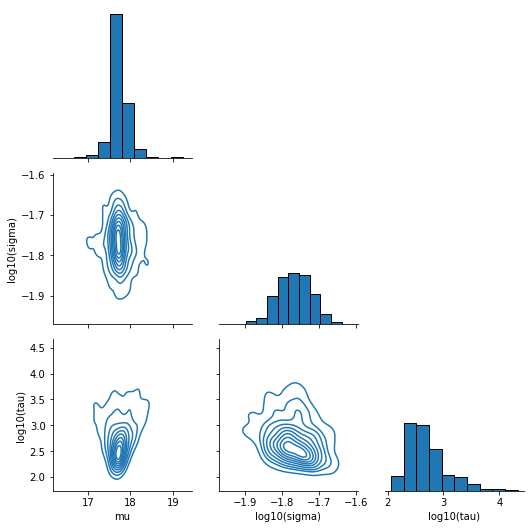

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

log_sigma=np.log10(sigma)
log_tau = np.log10(tau)
df = pd.DataFrame(list(zip(mu, log_sigma,log_tau)), columns=['mu', 'log10(sigma)', 'log10(tau)'])
grid = sns.PairGrid(df, vars=['mu', 'log10(sigma)', 'log10(tau)'], corner=True)
grid = grid.map_diag(plt.hist, bins = 10, edgecolor = 'k')
grid = grid.map_lower(sns.kdeplot)
plt.show()